# Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [142]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint
from random import randrange # Obtener un numero randomico
import pygame

In [3]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)

df

date  World  Afghanistan  Albania  Algeria  Andorra  Angola  \
0    2019-12-31     27          0.0      NaN      0.0      NaN     NaN   
1    2020-01-01      0          0.0      NaN      0.0      NaN     NaN   
2    2020-01-02      0          0.0      NaN      0.0      NaN     NaN   
3    2020-01-03     17          0.0      NaN      0.0      NaN     NaN   
4    2020-01-04      0          0.0      NaN      0.0      NaN     NaN   
..          ...    ...          ...      ...      ...      ...     ...   
110  2020-04-19  84112         63.0      9.0    117.0      8.0     5.0   
111  2020-04-20  74146         88.0     14.0     94.0      9.0     0.0   
112  2020-04-21  77274         35.0     22.0     89.0      4.0     0.0   
113  2020-04-22  87387         61.0     25.0     93.0      0.0     0.0   
114  2020-04-23  67629         84.0     25.0     99.0      6.0     0.0   

     Anguilla  Antigua and Barbuda  Argentina  ...  United States  \
0         NaN                  NaN        NaN  ...              0   
1         NaN                  NaN        NaN  ...              0   
2         NaN                  NaN        NaN  ...              0   
3         NaN                  NaN        NaN  ...              0   
4         NaN                  NaN        NaN  ...              0   
..        ...                  ...        ...  ...            ...   
110       0.0                  0.0      170.0  ...          32922   
111       0.0                  0.0      102.0  ...          24601   
112       0.0                  0.0       90.0  ...          28065   
113       0.0                  1.0      112.0  ...          37289   
114       0.0                  0.0      144.0  ...          17588   

     United States Virgin Islands  Uruguay  Uzbekistan  Vatican  Venezuela  \
0                             NaN      NaN         NaN      NaN        NaN   
1                             NaN      NaN         NaN      NaN        NaN   
2                             NaN      NaN         NaN      NaN        NaN   
3                             NaN      NaN         NaN      NaN        NaN   
4                             NaN      NaN         NaN      NaN        NaN   
..                            ...      ...         ...      ...        ...   
110                           2.0      9.0        45.0      0.0        0.0   
111                           0.0     11.0        70.0      0.0       29.0   
112                           1.0      7.0        92.0      1.0        0.0   
113                           0.0      8.0        35.0      0.0       29.0   
114                           0.0      6.0        24.0      0.0        3.0   

     Vietnam  Yemen  Zambia  Zimbabwe  
0        0.0    NaN     NaN       NaN  
1        0.0    NaN     NaN       NaN  
2        0.0    NaN     NaN       NaN  
3        0.0    NaN     NaN       NaN  
4        0.0    NaN     NaN       NaN  
..       ...    ...     ...       ...  
110      0.0    0.0     5.0       1.0  
111      0.0    0.0     4.0       0.0  
112      0.0    0.0     4.0       0.0  
113      0.0    0.0     0.0       3.0  
114      0.0    0.0     9.0       0.0  

[115 rows x 208 columns]

Imprimos los resultados y agregamos el numero del dia


In [5]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

date  Ecuador
0      -1      0.0
1       0      0.0
2       1      0.0
3       2      0.0
4       3      0.0
..    ...      ...
110   109    572.0
111   110    446.0
112   111    660.0
113   112    270.0
114   113    452.0

[115 rows x 2 columns]

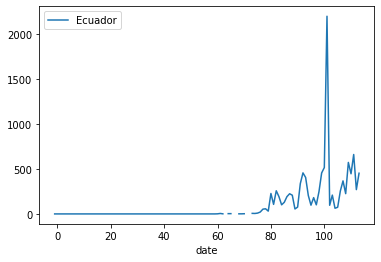

In [7]:
df.plot(x ='date', y='Ecuador')

Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.



In [143]:
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


129.0
221.42857142857142


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [150]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t=df_t.dropna()
dias = list(df_t['date'])
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias


#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

10979


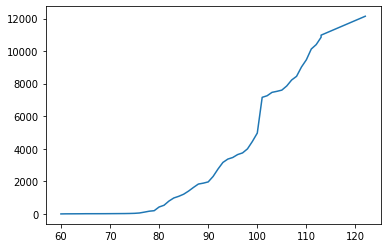

In [42]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.

for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()



# Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.
3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

# 1. Comparar el modelo de predicion matematico vs probabilidad.

In [145]:
def func(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3

In [146]:
g = [100, 0.01, 200, 0.01]
n = len(x[61:])
y = np.empty(n)
for i in range(n):
    y[i] = func(x[i], g[0], g[1], g[2], g[3])


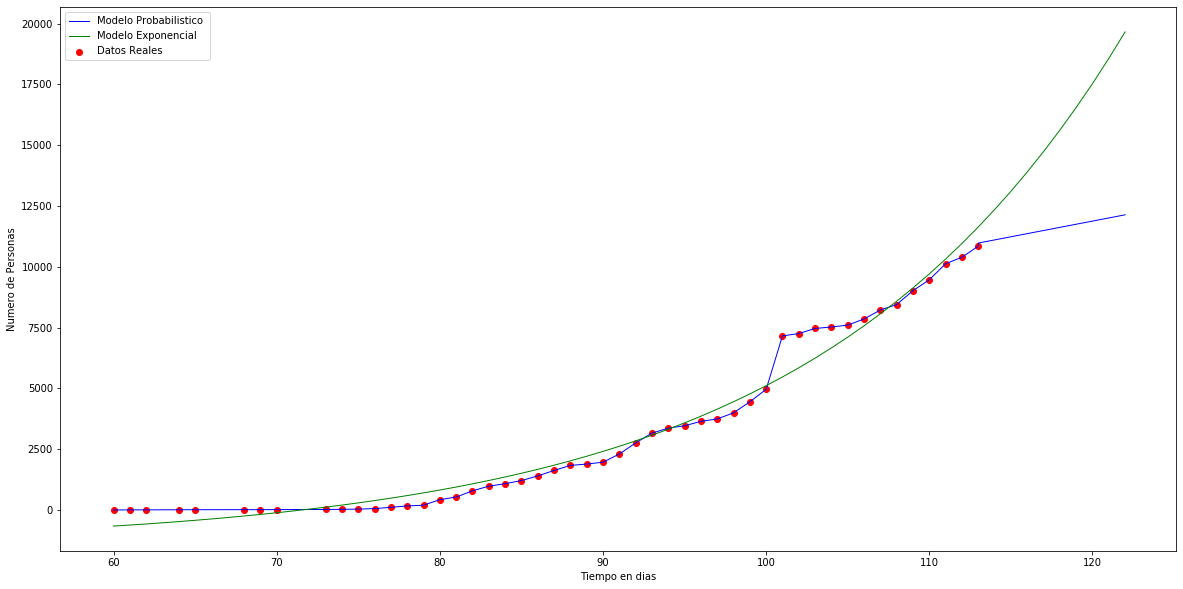

In [152]:
#Modelo Probabilidad
y1 = list(df_t.iloc [:, 1]) # Total casos
x1 = list(df_t.iloc [:, 0]) # Dias
#Prediccion 10 dias
for i in range(x1[-1], x1[-1]+10):
    x1.append(i)
    y1.append(int(y1[-1] + mediana))

#Modelo exponencial
yy = list(df_t.iloc [:, 1]) # Total casos
xx = list(df_t.iloc [:, 0]) # Dias
casos = list(df_t.iloc [:, 1])# Total casos
dias = list(df_t.iloc [:, 0]) # Dias

popt, pcov = curve_fit(func, dias[61:], casos[61:], g)
for i in range(n):
    casos[i] = func(dias[i], popt[0], popt[1], popt[2], popt[3])


#Predecir para 10 dias
pred_x = np.array(list(range(min(dias[61:]),max(dias[61:])+10)))
#  Grafica 1
fig = go.Figure()

fig.add_trace(go.Scatter(y=yy[61:],x=xx[61:],mode='markers',name='Datos Reales'))
fig.add_trace(go.Scatter(y=func(pred_x,*popt),x=pred_x,mode='lines',name='Modelo Exponencial'))
fig.add_trace(go.Scatter(y=y1[61:],x=x1[61:],mode='lines',name='Modelo Probabilistico'))

fig.show()
xa=t[0:len(y)]
#  Grafica 2
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(x1[61:], y1[61:], 'b', alpha=1, lw=1, label='Modelo Probabilistico ')
ax.plot(pred_x, func(pred_x,*popt), 'g', alpha=1, lw=1, label='Modelo Exponencial')
ax.scatter(xx[61:], yy[61:],label="Datos Reales",color="red")
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')

legend = ax.legend()

# 2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.

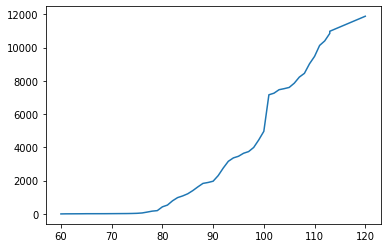

In [153]:
y0 = list(df_t.iloc [:, 1]) # Total casos
x0 = list(df_t.iloc [:, 0]) # Dias
#modelo de probabilidad 
#semana de prediccion.
for i in range(x0[-1], x0[-1]+8):
    x0.append(i)
    y0.append(int(y0[-1] + mediana))
plt.plot(x0[61:], y0[61:])
plt.show()
dias=x0[61:]
data=y0[61:]

Valor de Beta  2.7457575123371275e-05
Valor de Gamma  1e-08
Valor de R0  2745.7575123371275


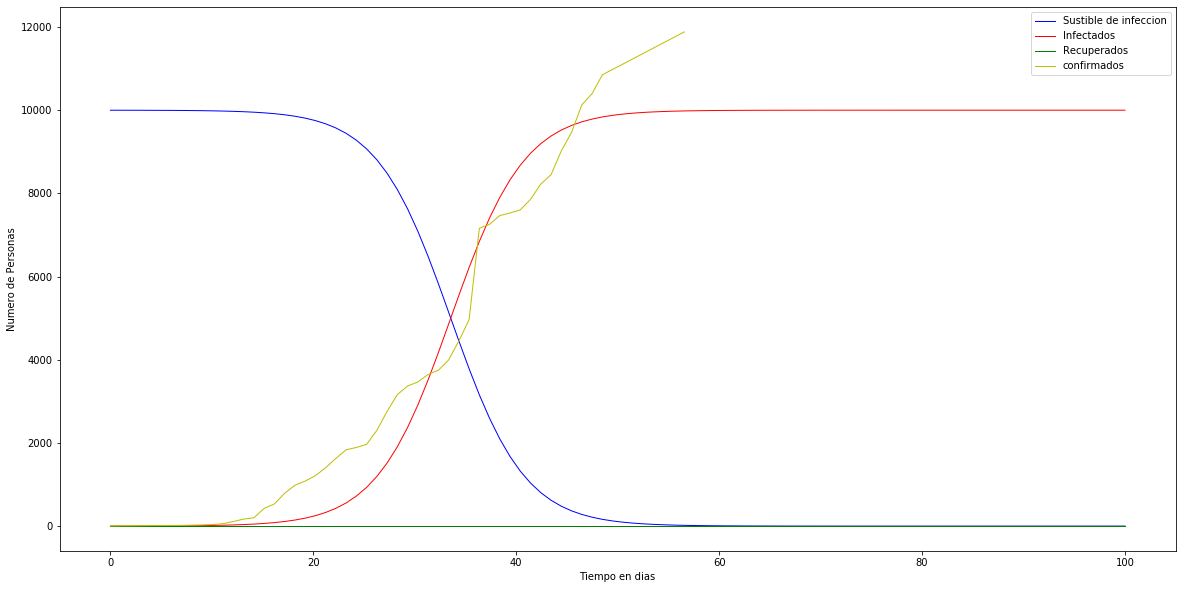

In [154]:
#Modelo SIR

# 3. Implementar teniendo en cuenta los casos confirmados y recuperados.
def loss(point, datos, s0, i0, r0):
    size = len(datos)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s0,i0,r0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - datos)**2))

#Numero habitantes del Ecuador
N=10000
#casos confirmados
i0=1
#Recuperados
r0=0
#Resto de la poblacion
s0= N - i0 - r0

x = dias

y = data
datos=data
optimal = minimize(loss, [0.001, 0.001], args=(datos,s0,i0, r0), method='L-BFGS-B', bounds=[(0.00000001,0.04), (0.00000001, 0.04)])   
beta, gamma = optimal.x
R00=(beta/gamma)

print('Valor de Beta ',beta)
print('Valor de Gamma ',gamma)
print('Valor de R0 ',R00) 

new_index =y
size = len(new_index)
ea = np.concatenate((y, [None] * (size - len(y))))
t = np.linspace(0, 100, 100)
# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I  - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = s0,i0,r0

# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = ret.T # Obtenicion de resultados
xa=t[0:len(y)]
#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=1, lw=1, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=1, lw=1, label='Infectados')
ax.plot(t, R, 'g', alpha=1, lw=1, label='Recuperados')
ax.plot(xa, ea, 'y', alpha=1, lw=1, label='confirmados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')

legend = ax.legend()

# 3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

Modelo Probabilistico 
Prediccion en 7 dias =:  8890

Modelo Exponencial 
Prediccion en 7 dias =:  15459

Datos Reales
En 7 dias =:  10850.0


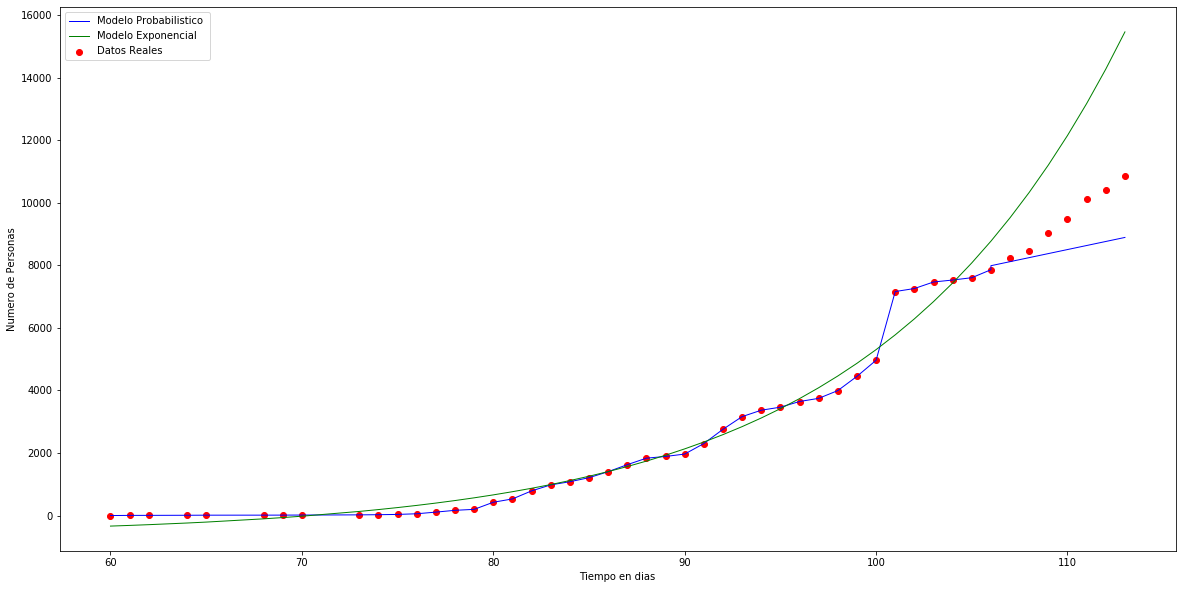

In [141]:


def func(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3
g = [100, 0.01, 200, 0.01]
n = len(x[61:])
y = np.empty(n)
for i in range(n):
    y[i] = func(x[i], g[0], g[1], g[2], g[3])
    
#Modelo Probabilidad
y1 = list(df_t.iloc [:, 1][:103]) # Total casos
x1 = list(df_t.iloc [:, 0][:103]) # Dias
y_real = list(df_t.iloc [:, 1]) # Total casos
x_real = list(df_t.iloc [:, 0]) # Dias

#Prediccion 10 dias
for i in range(x1[-1], x1[-1]+8):
    x1.append(i)
    y1.append(int(y1[-1] + mediana))

#Modelo exponencial
yy = list(df_t.iloc [:, 1][:103]) # Total casos
xx = list(df_t.iloc [:, 0][:103]) # Dias
casos = list(df_t.iloc [:, 1][:103])# Total casos
dias = list(df_t.iloc [:, 0][:103]) # Dias

popt, pcov = curve_fit(func, dias[61:], casos[61:], g)
for i in range(n):
    casos[i] = func(dias[i], popt[0], popt[1], popt[2], popt[3])


#Predecir para 10 dias
pred_x = np.array(x_real[61:])

print("Modelo Probabilistico ")
print("Prediccion en 7 dias =: ",*y1[61:][-1:])
print("")
print("Modelo Exponencial ")
print("Prediccion en 7 dias =: ",int(func(pred_x,*popt)[-1:]))
print("")
print("Datos Reales")
print("En 7 dias =: ",*y_real[61:][-1:])
fig = go.Figure()

fig.add_trace(go.Scatter(y=y_real[61:],x=x_real[61:],mode='markers',name='Datos Reales'))
fig.add_trace(go.Scatter(y=func(pred_x,*popt),x=pred_x,mode='lines',name='Modelo Exponencial'))
fig.add_trace(go.Scatter(y=y1[61:],x=x1[61:],mode='lines',name='Modelo Probabilistico'))

fig.show()

#  Grafica
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111,  axisbelow=True)
ax.scatter(x_real[61:], y_real[61:],label="Datos Reales",color="red")
ax.plot(x1[61:], y1[61:], 'b', alpha=1, lw=1, label='Modelo Probabilistico ')
ax.plot(pred_x, func(pred_x,*popt), 'g', alpha=1, lw=1, label='Modelo Exponencial')

ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
legend = ax.legend() 




## Analisis
Al realizar la comparación con los modelos Probabilístico y el modelo matemático exponencial, en una predicción de 7 días, se obtienen los siguientes datos.

1. Modelo Probabilistico 
Prediccion en 7 dias =:  8890

2. Modelo Exponencial 
Prediccion en 7 dias =:  15459

3. Datos Reales
En 7 dias =:  10850.0

Donde observamos que los dos modelos tienen una aproximación, la diferencia es que el probabilístico tiene una aproximación con tendencia baja es decir una aproximación menor al valor real, y el exponencial tiene una tendencia creciente, es decir una aproxima superior al valor real.

También en el calculo del modelo SIR se obtiene valores de:
1. Valor de Beta  2.7457575123371275e-05
2. Valor de Gamma  1e-08
3. Valor de R0  2745.7575123371275


## Conclusiones

Con los datos obtenidos de los dos modelos y después de realizar las diferentes comparaciones llegamos a la conclusión de que ambos modelos tienen un gran grado de acierto en la predicción de los datos, y si se hiciera una valoración matemática en cuanto al ajuste de la curva ambos modelos tendrían resultados casi parecido solo que valores creciente( Modelo exponencial) y decreciente(Modelo probabilístico), por otra parte en la predicción al restar 7 días y realizar las predicciones vemos que los dos modelos casi se acercan a los datos correctos teniendo un grado de falla bajo 


## Criterio personal (politico, economico y  social de la situacion)

Con los datos históricos que se tienen vemos que la predicción no es tan correcta ya que los datos no son correctos, la información de contagios y muertes puede estar alterada y dado esto no se puede realizar un modelo de predicción apegado a la realidad, y dado  a la situación del país se observa que ya se rebasa los 20 mil infectados en el país y esto a una mala organización y administración por parte del gobierno y  también por la irresponsabilidad de las personas que no acatan el aislamiento y la cuarentena 



# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/